In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import numpy as np

# 1. One dimensional case

In [2]:
def f(x):
    return x**3 -2*x + 2

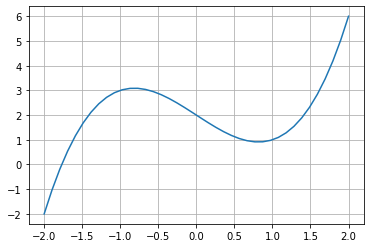

In [3]:
x = np.linspace(-2, 2, 40)

plt.plot(x, f(x))
plt.grid()
plt.show()

In [4]:
def f_derived(x):
    return 3*x**2 - 2

In [5]:
x_1 = -np.sqrt(2/3)
x_2 = np.sqrt(2/3)

$x_1 = -\sqrt{\frac{2}{3}}$


$x_2 = \sqrt{\frac{2}{3}}$

In [6]:
def f_derived_2(x):
    return 6*x

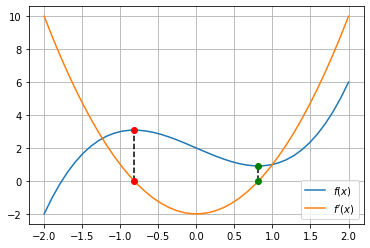

In [7]:
plt.clf()

plt.plot(x, f(x), label=r'$f(x)$')
plt.plot(x, f_derived(x), label=r"$f'(x)$")

plt.vlines(x_1, ymin=0, ymax=f(x_1), colors=['k'], linestyle=['dashed'])
plt.vlines(x_2, ymin=0, ymax=f(x_2), colors=['k'], linestyle=['dashed'])

plt.plot(x_1, f(x_1), 'ro')
plt.plot(x_1, f_derived(x_1), 'ro')

plt.plot(x_2, f(x_2), 'go')
plt.plot(x_2, f_derived(x_2), 'go')

plt.grid()
plt.legend()
plt.show()

$f''(x) = 6x$

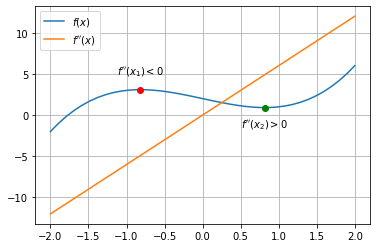

In [8]:
plt.clf()

plt.plot(x, f(x), label=r'$f(x)$')
plt.plot(x, f_derived_2(x), label=r"$f''(x)$")

plt.text(x=x_1, y=5, s=r"$f''(x_1) < 0$", ha='center')
plt.text(x=x_2, y=-1.5, s=r"$f''(x_2) > 0$", ha='center')

plt.plot(x_1, f(x_1), 'ro')
plt.plot(x_2, f(x_2), 'go')

plt.legend()
plt.grid()
plt.show()

# 2. Two dimensional case
## 2.1 A simple two-dimensional function

In [9]:
def f(x_0, x_1):
    return x_0**2 + x_1**2

In [10]:
def plot_function_surface(func, x_1_range=(-2, 2), x_2_range=(-2, 2), n_samples=100):
    # Clear the plot
    plt.clf()
    
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection='3d')

    x_1 = np.linspace(*x_1_range, n_samples)
    x_2 = np.linspace(*x_2_range, n_samples)
    X_1, X_2 = np.meshgrid(x_1, x_2)

    Z = np.array(func(np.ravel(X_1), np.ravel(X_2))).reshape(X_1.shape)

    ax.plot_surface(X_2, X_1, Z, cmap=cm.jet, rcount=100, ccount=100)
    
    # Set labels
    ax.set_xlabel(r'$x_2$')
    ax.set_ylabel(r'$x_1$')
    ax.set_zlabel(r'$f(x_1, x_2)$')
    
    plt.show()

<Figure size 432x288 with 0 Axes>

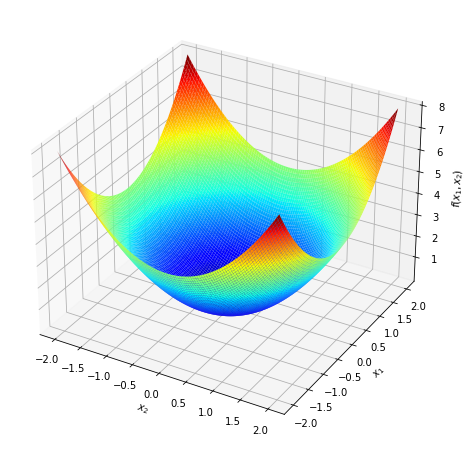

In [11]:
plot_function_surface(f)

As we can see in the previous figure, this a paraboloid that has a minimum at $(0, 0)$.

In [12]:
def grad_f(x_0, x_1):
    return [2*x_0, 2*x_1]

$x^\star = (0, 0)$

In [13]:
def hessian_f():
    return np.array([[2, 0], [0, 2]])

In [14]:
hessian_f()

array([[2, 0],
       [0, 2]])

We can clearly see that there's a single degenerate eigenvalue, which is 2 at every single point of the plane. Since the only critical point is the origin, we have sufficient conditions to determine that $x^\star$ is a minimum for our funcion $f(x)$.

In [15]:
def f_A(x_1, x_2):
    return -f(x_1, x_2)

<Figure size 432x288 with 0 Axes>

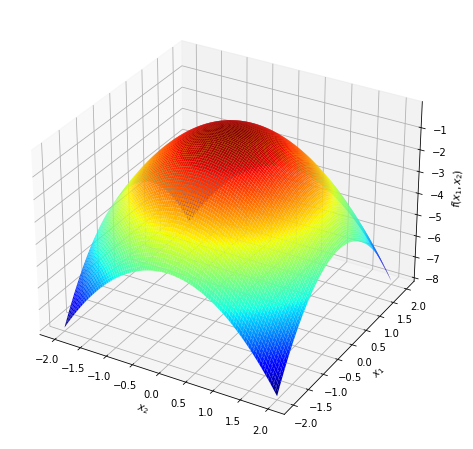

In [16]:
plot_function_surface(f_A)

We have the paraboloid from $f(x)$, but in this case it is inverted. The gradient is only going to be 0 at the origin once again and the Hessian matrix is also going to be the opposite of the Hessian matrix of $f(x)$. So, we only have a single degenerate eigenvalue which is $-2$. For the same reasons as before $x^\star = (0, 0)$ is a maximum of our function $f_A(x)$.

In [17]:
def f_B(x_1, x_2):
    return x_1**2 - x_2**2

<Figure size 432x288 with 0 Axes>

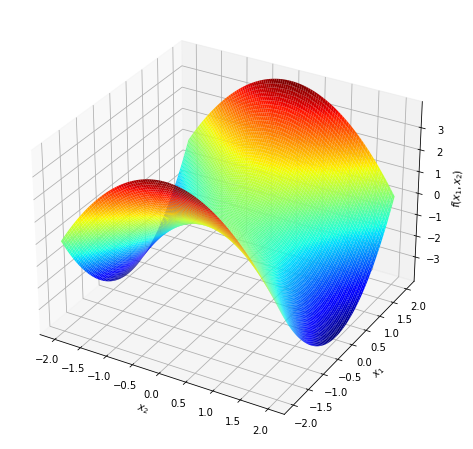

In [18]:
plot_function_surface(f_B)

We can already see that $f_B(x)$ has the shape of a saddle and therefore it is not going to have any minimums or maximums.

In [19]:
def grad_f_B(x_1, x_2):
    return [2*x_1, -2*x_2]

Once again, we have that $x^\star = (0, 0)$ is the **only** critical point of the function $f_B(x)$.

In [20]:
def hessian_f_b():
    return np.array([[2, 0], [0, -2]])

In [21]:
hessian_f_b()

array([[ 2,  0],
       [ 0, -2]])

In this case we have two eigenvalues of different sign: $\lambda_1=2$ and $\lambda_2 = -2$. Thus our Hessian matrix is indefinite at every point of the plane. In this case there are no maximums or minimums for our function and $x^\star$ is the classical example of a saddle point of $\mathbb{R}^2$ defined functions.

In [22]:
def f_C(x_1, x_2):
    return x_1**2

<Figure size 432x288 with 0 Axes>

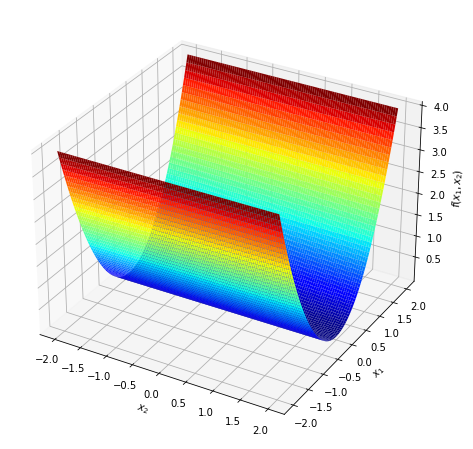

In [23]:
plot_function_surface(f_C)

In [24]:
def grad_f_C(x_1, x_2):
    return [2*x_1, 0]

All the points in the line $x_1 = 0$ are critical points of our function.

In [25]:
def hessian_f_C():
    return np.array([[2, 0], [0, 0]])

In this case, the eigenvalues are $\lambda_1 = 2 > 0$ and $\lambda_2 = 0$. Thus, our Hessian matrix is going to be positive semidefinite for all $x \in \mathbb{R}^2$. This implies that $f_C(x)$ is convex and this is enough to justify that $f_C(x)$ reaches its minimum at all the points of the line $x_1 = 0$.

## 2.2 A more complex two dimensional function

In [26]:
def f(x_1, x_2):
    return x_1**2 * (4- 2.1 * x_1**2 + (1/3) * x_1**4) + x_1 * x_2 + x_2**2 * (-4 + 4*x_2**2)

<Figure size 432x288 with 0 Axes>

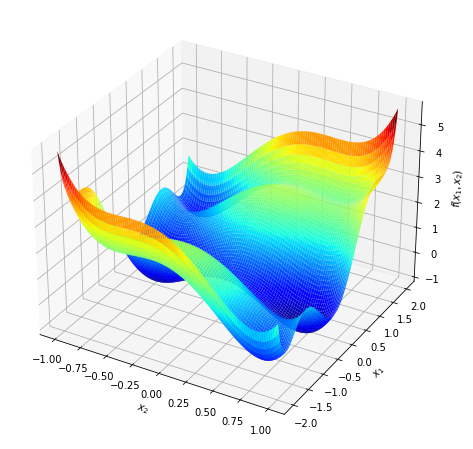

In [27]:
plot_function_surface(f, x_2_range=(-1, 1))

In [28]:
def grad_f(x_1, x_2):
    return np.array([8*x_1 - 8.4*x_1**3 + 2*x_1**5 + x_2, x_1 - 8*x_2 + 16*x_2**3])

In [29]:
def hessian_f(x):
    return np.array([[8 - 25.2*x[0]**2 + 10*x[0]**4, 1], [1, -8 + 48*x[1]**2]])

In [30]:
def brute_force_search(func):
    x = np.arange(-2, 2.005, 0.005)
    y = np.arange(-1, 1.005, 0.005)
    
    X, Y = np.meshgrid(x, y)
    grid_shape = X.shape
    
    # Returns a (2, 321201) ndarray
    # The first row contains the partial derivatives of x_1
    # The second row contains the partial derivatives of x_2
    Z = func(np.ravel(X), np.ravel(Y))
    Z_norm = Z[0, :]**2 + Z[1, :]**2
    
    Z_norm_grid = Z_norm.reshape(grid_shape)
    
    X_extrema = []
    Y_extrema = []
    grad_extrema = []
    
    for i in range (1, grid_shape[0] - 1):
        for j in range (1, grid_shape[1] - 1):
            neighborhood = Z_norm_grid[i-1:i+2, j-1:j+2].ravel()
            
            # Remove current element from the list of neighbors            
            neighbors = np.r_[neighborhood[:4], neighborhood[5:]]
            
            if np.all(Z_norm_grid[i, j] < neighbors):
                X_extrema.append(X[i, j])
                Y_extrema.append(Y[i, j])
                grad_extrema.append(Z_norm_grid[i, j])

    return np.array(X_extrema), np.array(Y_extrema), np.array(grad_extrema)

In [31]:
X_extrema, Y_extrema, grad_extrema = brute_force_search(grad_f)

for x, y, g in zip(X_extrema, Y_extrema, grad_extrema):
    print(x, y, g)

1.704999999999921 -0.7949999999999998 0.00143016789599396
1.1099999999999337 -0.7699999999999998 0.0012559284739304191
0.08999999999995545 -0.7149999999999997 0.0014768714734526888
-1.295000000000015 -0.6049999999999996 4.540503633256789e-05
-1.6050000000000084 -0.5699999999999996 0.0004156534940928455
-1.6400000000000077 -0.22999999999999932 0.00067458253056989
-1.2300000000000164 -0.15999999999999925 0.00024181811612573363
-4.263256414560601e-14 8.881784197001252e-16 1.181910851247381e-25
1.2299999999999311 0.16000000000000103 0.0002418181161218803
1.6399999999999224 0.2300000000000011 0.000674582530516444
1.6049999999999232 0.5700000000000014 0.00041565349412206665
1.2949999999999298 0.6050000000000013 4.5405036339608944e-05
-0.09000000000004071 0.7150000000000016 0.0014768714734470522
-1.110000000000019 0.7700000000000016 0.0012559284739378034
-1.7050000000000063 0.7950000000000017 0.0014301678960872899


In [32]:
XY = np.column_stack([X_extrema, Y_extrema])
hessians = np.apply_along_axis(hessian_f, 1, XY)

In [33]:
hessians_eigvals = np.linalg.eigvals(hessians)
hessians_eigvals

array([[18.95522803, 22.63288548],
       [-7.90347351, 20.49445761],
       [ 7.683608  , 16.6517281 ],
       [-6.20031498,  9.63261349],
       [ 9.88074954,  7.15766846],
       [12.61687844, -5.51611684],
       [-8.03050482, -5.97711108],
       [ 8.06225775, -8.06225775],
       [-8.03050482, -5.97711108],
       [12.61687844, -5.51611684],
       [ 9.88074954,  7.15766846],
       [-6.20031498,  9.63261349],
       [ 7.683608  , 16.6517281 ],
       [-7.90347351, 20.49445761],
       [18.95522803, 22.63288548]])